In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
dataset = pd.read_csv('creditcard.csv')
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
x = dataset.iloc[: , 1:30].values
y = dataset.iloc[:, 30].values
print("Input Range : ", x.shape)
print("Output Range : ", y.shape)
print ("Class Labels : \n", y)

Input Range :  (284807, 29)
Output Range :  (284807,)
Class Labels : 
 [0 0 0 ... 0 0 0]


In [6]:
dataset.isnull().values.any()

False

In [7]:
fraud_data = dataset[dataset['Class']==1]
normal_data = dataset[dataset['Class']==0]
print(fraud_data.shape,normal_data.shape)

(492, 31) (284315, 31)


Class
0    284315
1       492
Name: count, dtype: int64


C:\Users\Gopal Sharma\AppData\Local\Temp\ipykernel_19868\3314991253.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  set_class = pd.value_counts(dataset['Class'], sort = True)


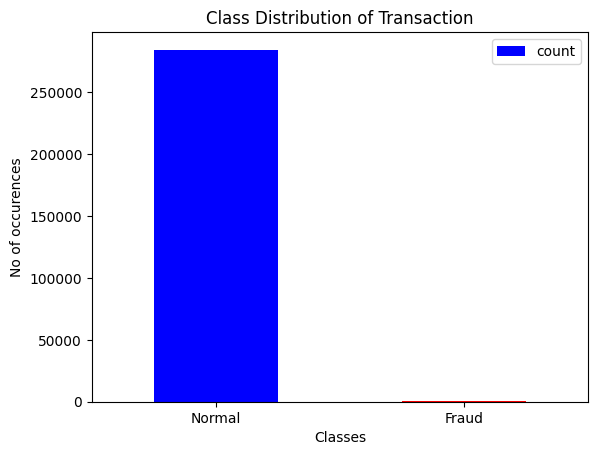

In [8]:
set_class = pd.value_counts(dataset['Class'], sort = True)

print(set_class)

set_class.plot(kind = 'bar', rot=0,color=["b","r"])

plt.xticks(range(2), labels= ["Normal", "Fraud"])
plt.title("Class Distribution of Transaction")
plt.xlabel("Classes")
plt.ylabel("No of occurences")
plt.legend()
plt.show()

In [9]:
#statical summary
fraud_data.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [10]:
normal_data.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

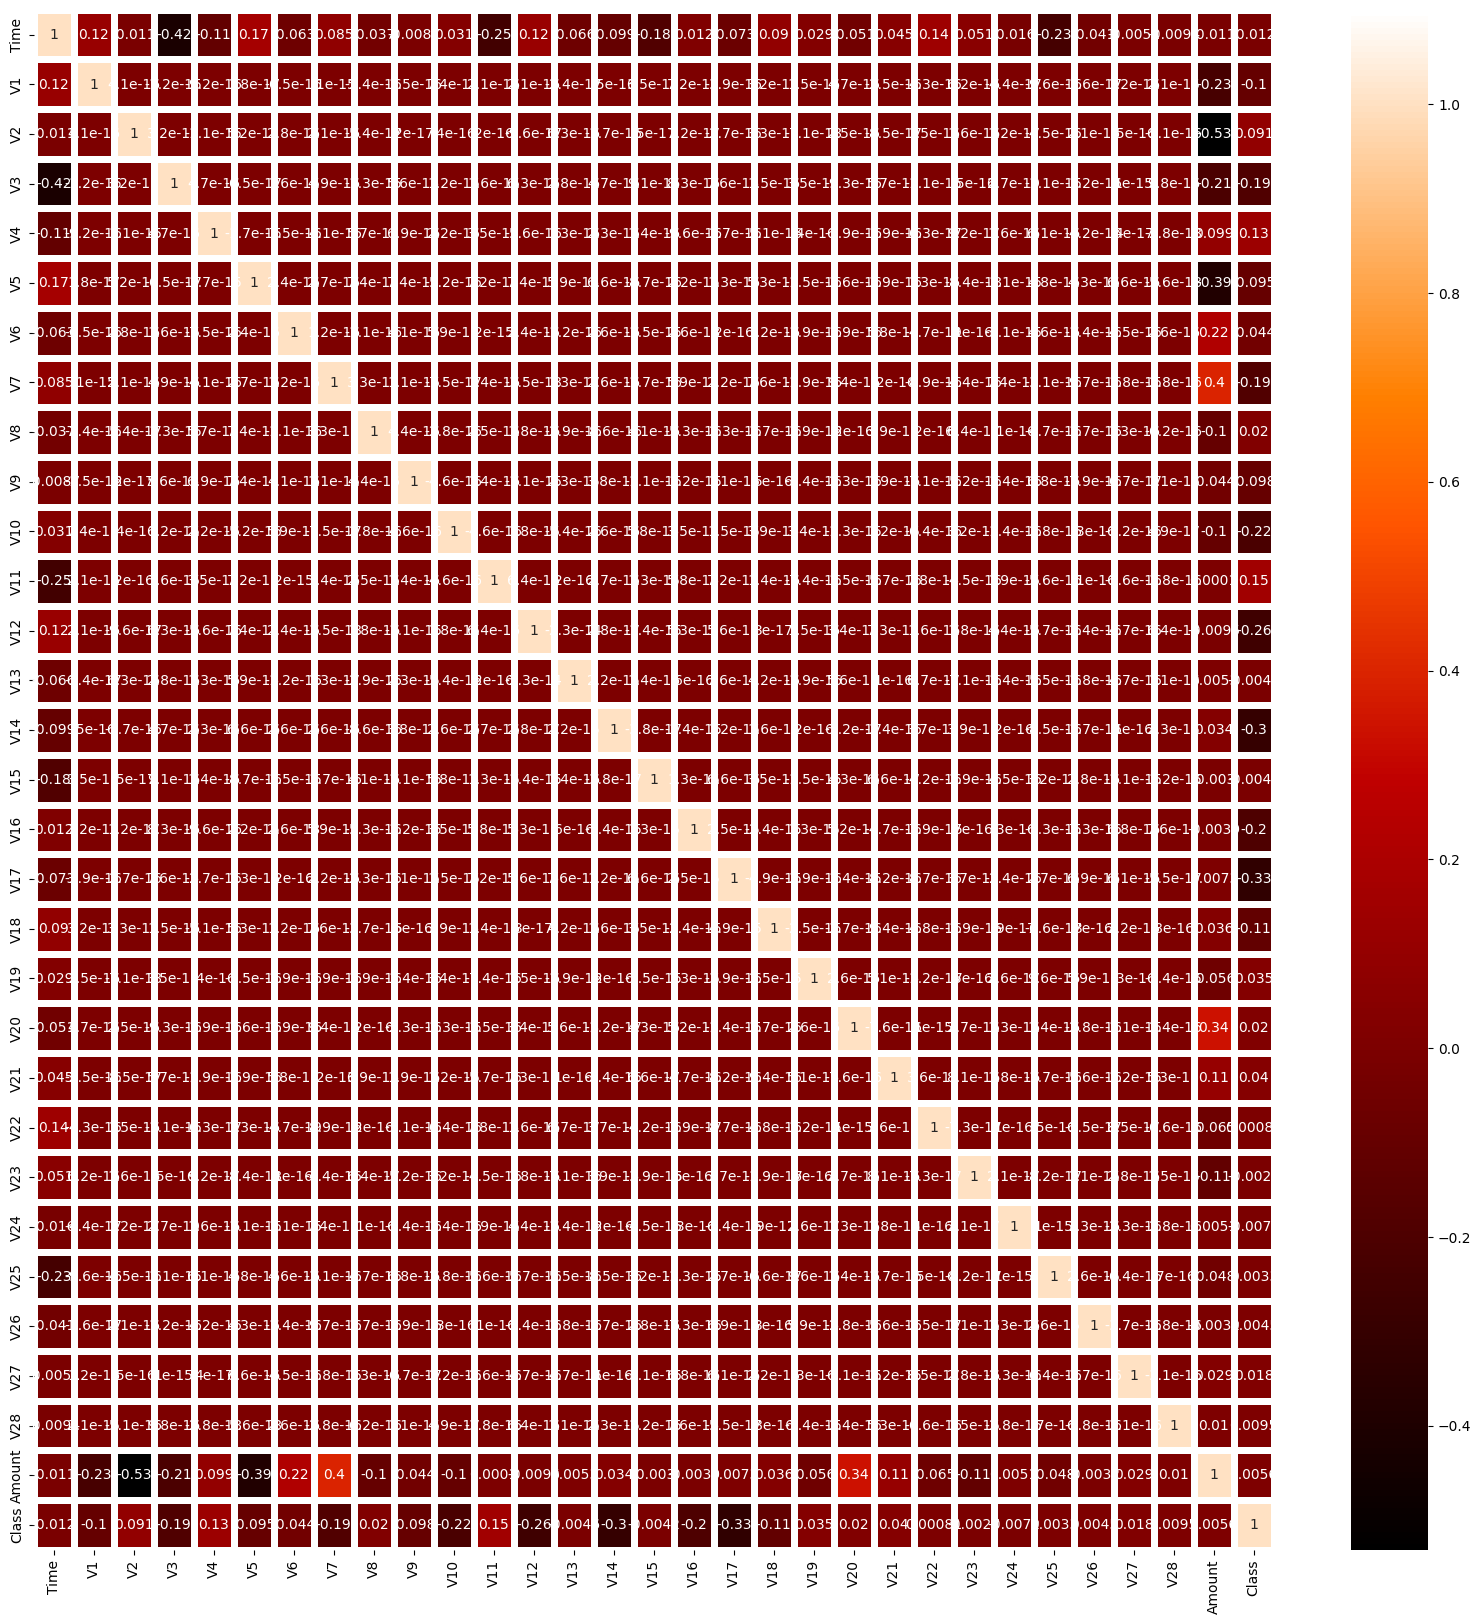

In [11]:
#Each and every attribute , dusre attributes ke sath kaise correlate karta hai.use show karne ke liye hum heatmap ka use kar sakte hai.
#heatmap me hum jo bhi data dete hai, to us data ko hum color ke throw represent karte hai.
## Correlation
import seaborn as sns
#get correlations of each features in dataset
corrmat = dataset.corr()

# print(corrmat)

top_corr_features = corrmat.index

# print(top_corr_features)

plt.figure(figsize=(20,20))
#plot heat map
# g=sns.heatmap(dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

g=sns.heatmap(dataset[top_corr_features].corr(),cmap="gist_heat",annot=True,linewidth=5,vmax=1.1)

In [12]:
# sns.heatmap(dataset.head(10),vmin=0,vmax=15,cmap="gist_heat",annot=True,linewidth=5)

In [13]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state = 0)
print("xtrain.shape : ", xtrain.shape)
print("xtest.shape  : ", xtest.shape)
print("ytrain.shape : ", ytrain.shape)
print("ytest.shape  : ", ytest.shape)

xtrain.shape :  (213605, 29)
xtest.shape  :  (71202, 29)
ytrain.shape :  (213605,)
ytest.shape  :  (71202,)


In [14]:
#yaha per sabhi value ka uninform distribution nahi hoga.to iske liye hame trainning and testing form ko hame proper way me transform karna padega.
#usko proper formate me convert karenge to us data ko samajh sakenge.data ki value ko normalize nahi karenge to data ki value dusri jagah lie karegi.
#to usse better hai ki use standarized killer se kill kar de.Isiliye hamne yaha per standard Scaler ka use kiya hai.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)
print("Training Set after Standardised : \n", xtrain[0])

Training Set after Standardised : 
 [ 1.04272047  0.06657394 -1.19051456  0.05060912  0.18235446 -1.31399333
  0.58133086 -0.40257892 -0.09319222  0.16481198  1.60036637  1.18028602
 -0.24273404  1.08764203 -0.35935009 -0.76863613 -0.28881862 -0.39536117
  0.13774039 -0.34055771  0.32484688  1.13026957  0.03716189  0.90724443
  0.61754959  0.39904973 -0.21031503 -0.2607924  -0.35356699]


In [15]:
# Ab hum yaha per hamare data ko dicision tree classifier ki help se classify karenge.
#gini criterion measure the quality of split. Information gain ke liye entropy use me hoti hai.
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt.fit(xtrain, ytrain)
predict = dt.predict(xtest)

#hame yaha per 0 or 1 me hi output milega. 0 mean not fraudulan data or 1 yani fraudulan data mean jisme fraud huaa hai.
print("y_pred_decision_tree : \n",predict)

y_pred_decision_tree : 
 [0 0 0 ... 0 0 0]


In [16]:
from sklearn.metrics import confusion_matrix
#confusion metrix yaha per hamare original accurate data or predicted jo bhi output aaya hai , un dono ko compare karega or hame ek metrix dega.
#jise hum kahte hai confusion metrix.
con = confusion_matrix(ytest, predict)
print("confusion Matrix : \n", con)


#Actual/Predicted:     NO                    YES
#            NO     [[True_Negetive       False_Positive],
#            YES     [False_Negetive      True_Positive]]


confusion Matrix : 
 [[71052    30]
 [   25    95]]


In [17]:
Accuracy = ((con[0][0] + con[1][1]) / con.sum()) *100 #(True positive + True negetive)/Total
print("Accuracy Score : ", Accuracy)

Error= ((con[0][1] + con[1][0]) / con.sum()) *100  #Essossate:1-accuracy or #(False positive + False negetive)/Total
print("Error rate : ", Error)

# True Fake Rate
Specificity= (con[1][1] / (con[1][1] + con[0][1])) *100  #Precision_Specificity=(True positive / Predicted Yes)
print("Specificity : ", Specificity)

# True Genuine Rate
Sensitivity = (con[0][0] / (con[0][0] + con[1][0])) *100  #Sensitivity=(True Negetive / Predicted No)
print("Sensitivity : ", Sensitivity)

Accuracy Score :  99.92275497879272
Error rate :  0.07724502120726946
Specificity :  76.0
Sensitivity :  99.96482687789299
